# Installing requirements

* [Tensorflow 2](https://www.tensorflow.org/)
* [keras](https://keras.io/)
* [pandas](https://pandas.pydata.org/)
* [numpy](https://numpy.org/)
* [matplotlib](https://matplotlib.org/)
* [seaborn](https://seaborn.pydata.org/)

In [ ]:
# keras at this moment only it is compatible with python upto 3.7
!pip install tensorflow

In [ ]:
# keras at this moment only it is compatible with python upto 3.6
!pip install keras

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

# Getting ready, warm-up!

In [1]:
# For system
import sys
from packaging import version

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# pandas
import pandas as pd
# numpy
import numpy as np

# visualization
import matplotlib as mt
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

# configure jupyter
%matplotlib inline
%config InlineBackend.figure_format='retina'

# configure the rest
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 22

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Checking versions

In [2]:
assert sys.version_info >= (3, 7), "Python 3.7 o up is required"
assert version.parse(tf.__version__) >= version.parse("2.0.0"), f"Need 2.0 for tensorflow. Version installed: {version.parse(tf.__version__)}"
assert version.parse(pd.__version__) >= version.parse("0.25.3"), f"Need 0.25.3 or up for Pandas. Version installed: {version.parse(pd.__version__)}"
assert version.parse(np.__version__) >= version.parse("1.17.4"), f"Need 1.17.4 or up for Numpy. Version installed: {version.parse(np.__version__)}"
assert version.parse(mt.__version__) >= version.parse("3.1.2"), f"Need 3.1.2 or up for Matplotlib. Version installed: {version.parse(mt.__version__)}"
assert version.parse(sns.__version__) >= version.parse("0.9.0"), f"Need 0.9.0 or up for Seaborn. Version installed: {version.parse(sns.__version__)}"

# Practice

## Tensors

In [3]:
x = tf.constant(1)
print(x)

tf.Tensor(1, shape=(), dtype=int32)


In [4]:
x.numpy()

1

In [5]:
x.shape

TensorShape([])

In [6]:
tf.rank(x).numpy()

0

In [7]:
m = tf.constant([[1, 2, 1], [3, 4, 2]])
print(m)

tf.Tensor(
[[1 2 1]
 [3 4 2]], shape=(2, 3), dtype=int32)


In [8]:
st = tf.constant(["Hello", "World"])

In [9]:
print(st)

tf.Tensor([b'Hello' b'World'], shape=(2,), dtype=string)


In [10]:
tf.rank(st).numpy()

1

## Helpers

In [11]:
ones = tf.ones([3, 3])
print(ones)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [12]:
zeros = tf.zeros([2, 3])

In [13]:
print(zeros)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


In [14]:
print(tf.reshape(zeros, [3, 2]))

tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)


In [15]:
tf.transpose(zeros)

<tf.Tensor: id=14, shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

# Tensor Math

In [16]:
a = tf.constant(1)
b = tf.constant(1)

tf.add(a, b).numpy()

2

In [17]:
(a + b).numpy()

2

In [18]:
c = a + b
tf.square(c)

<tf.Tensor: id=20, shape=(), dtype=int32, numpy=4>

In [19]:
c * c

<tf.Tensor: id=21, shape=(), dtype=int32, numpy=4>

In [20]:
d1 = tf.constant([[1, 2], [1, 2]]);
d2 = tf.constant([[3, 4], [3, 4]]);

tf.tensordot(d1, d2, axes=1).numpy()

array([[ 9, 12],
       [ 9, 12]])

# Sampling

In [21]:
norm = tf.random.normal(shape=(1000, 1), mean=0., stddev=1.)

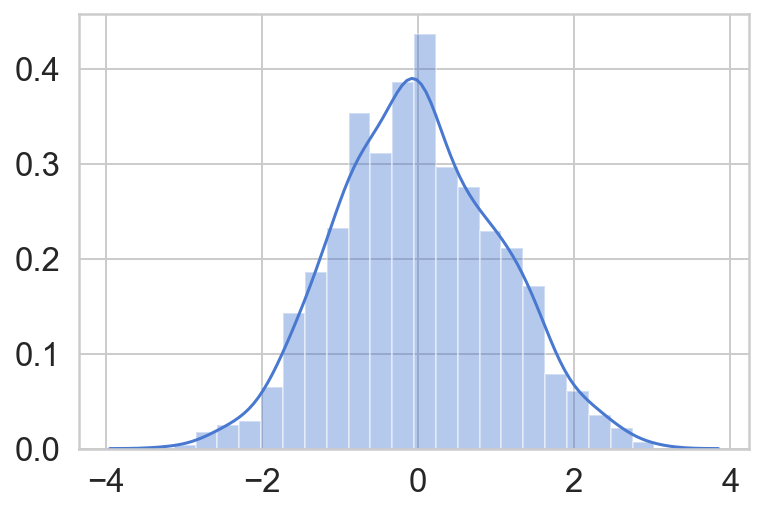

In [22]:
sns.distplot(norm);

In [23]:
unif = tf.random.uniform(shape=(1000, 1), minval=0, maxval=100)

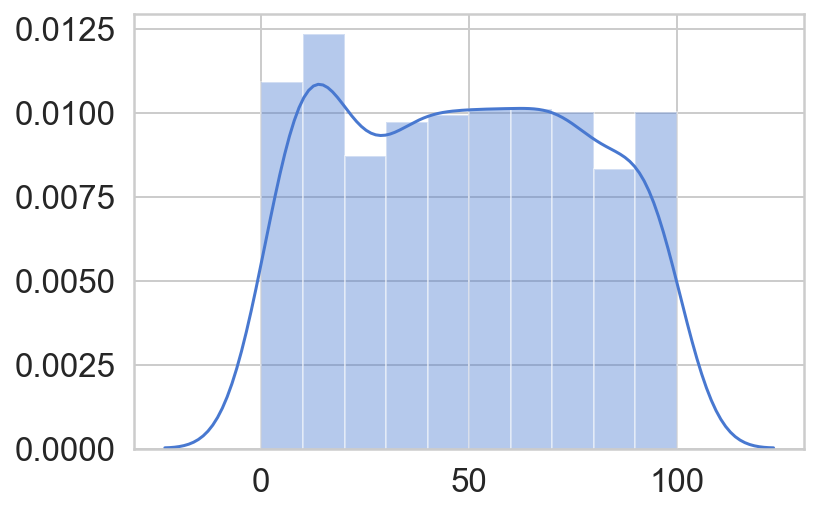

In [24]:
sns.distplot(unif);

In [25]:
pois = tf.random.poisson(shape=(1000, 1), lam=0.8)

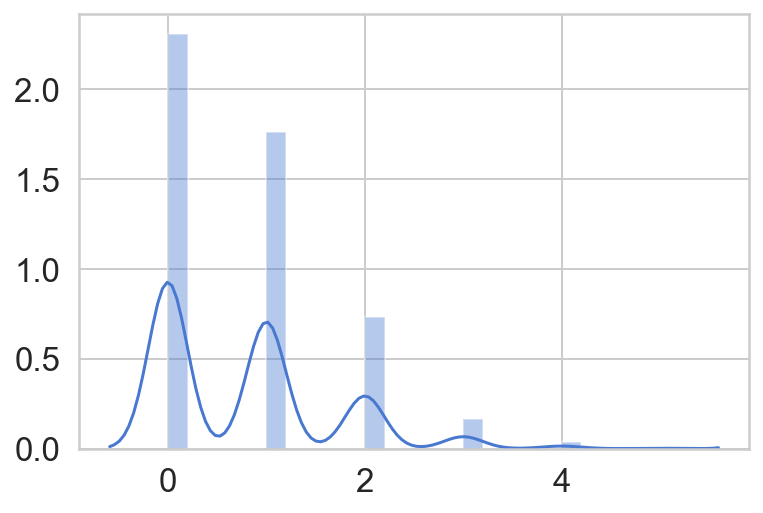

In [26]:
sns.distplot(pois);

In [27]:
gam = tf.random.gamma(shape=(1000, 1), alpha=0.8)

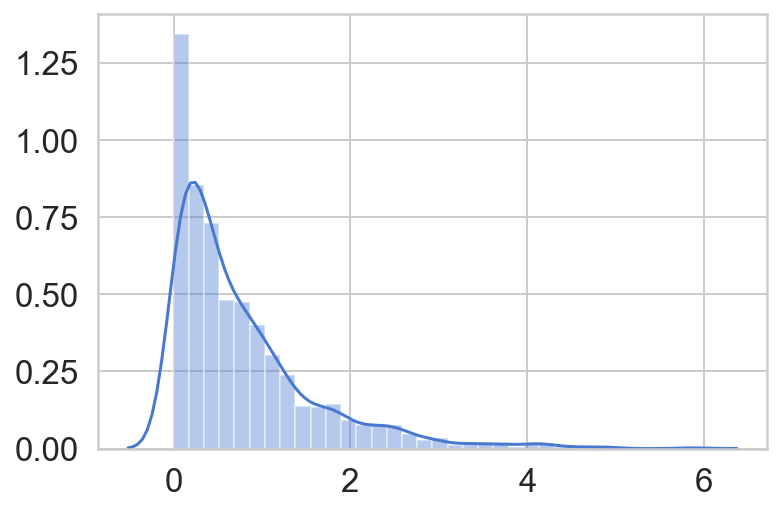

In [28]:
sns.distplot(gam);

# Linear Regression

In [29]:
data = tf.constant([
  [4,2],
  [4,10],
  [7,4],
  [7,22],
  [8,16],
  [9,10],
  [10,18],
  [10,26],
  [10,34],
  [11,17],
  [11,28],
  [12,14],
  [12,20],
  [12,24],
  [12,28],
  [13,26],
  [13,34],
  [13,34],
  [13,46],
  [14,26],
  [14,36],
  [14,60],
  [14,80],
  [15,20],
  [15,26],
  [15,54],
  [16,32],
  [16,40],
  [17,32],
  [17,40],
  [17,50],
  [18,42],
  [18,56],
  [18,76],
  [18,84],
  [19,36],
  [19,46],
  [19,68],
  [20,32],
  [20,48],
  [20,52],
  [20,56],
  [20,64],
  [22,66],
  [23,54],
  [24,70],
  [24,92],
  [24,93],
  [24,120],
  [25,85]
])

In [30]:
speed = data[:, 0]
stopping_distance = data[:, 1]

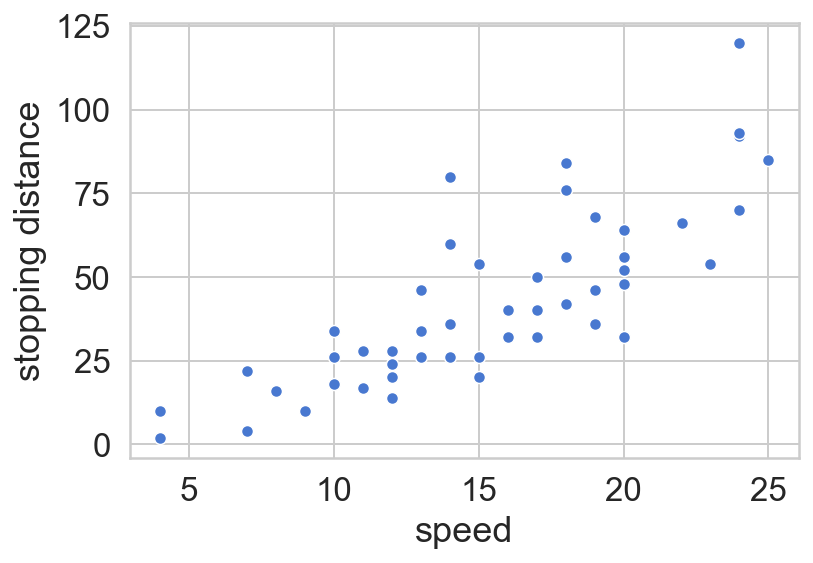

In [31]:
sns.scatterplot(speed, stopping_distance);
plt.xlabel("speed")
plt.ylabel("stopping distance");

In [32]:
lin_reg = keras.Sequential([
  layers.Dense(1, activation='linear', input_shape=[1]),
])

In [33]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

lin_reg.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])

In [34]:
history = lin_reg.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0
)

In [35]:
def plot_error(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error')

    plt.legend()
    plt.show()

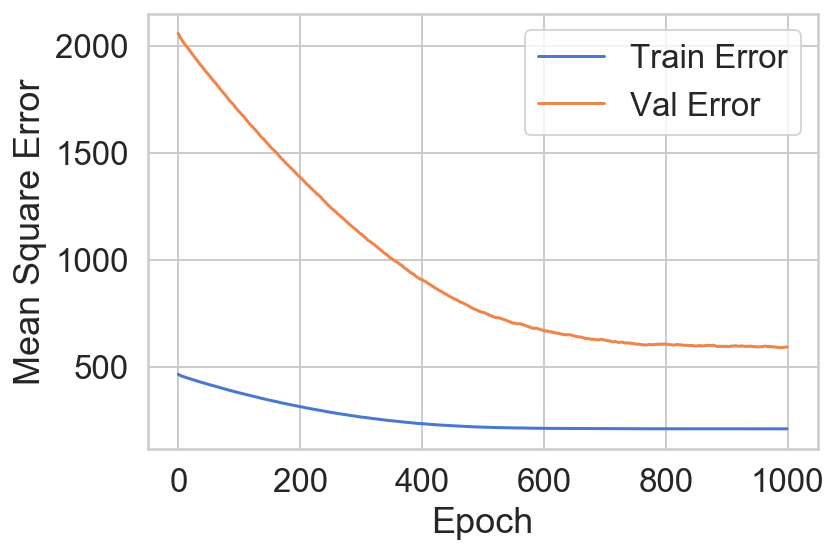

In [36]:
plot_error(history)

In [37]:
lin_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [38]:
weights = lin_reg.get_layer("dense").get_weights()
intercept = weights[0][0][0]
slope = weights[1][0]

In [39]:
slope

0.80907834

# Simple Neural Network

In [40]:
def build_neural_net():
    net = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[1]),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
    ])
   
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    net.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse', 'accuracy'])

    return net

In [41]:
net = build_neural_net()

In [42]:
history = net.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0
)

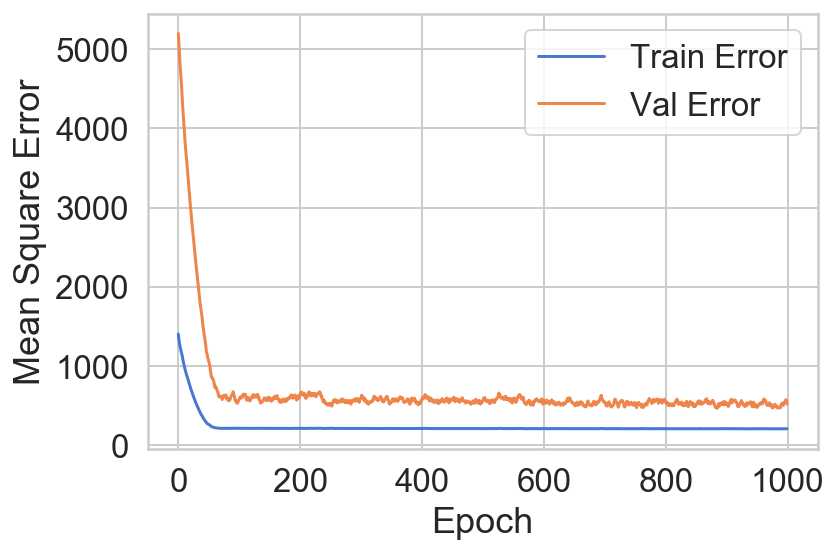

In [43]:
plot_error(history)

## Stop training early

In [44]:
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_loss',
  patience=10
)

In [45]:
net = build_neural_net()

history = net.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0,
  callbacks=[early_stop]
)

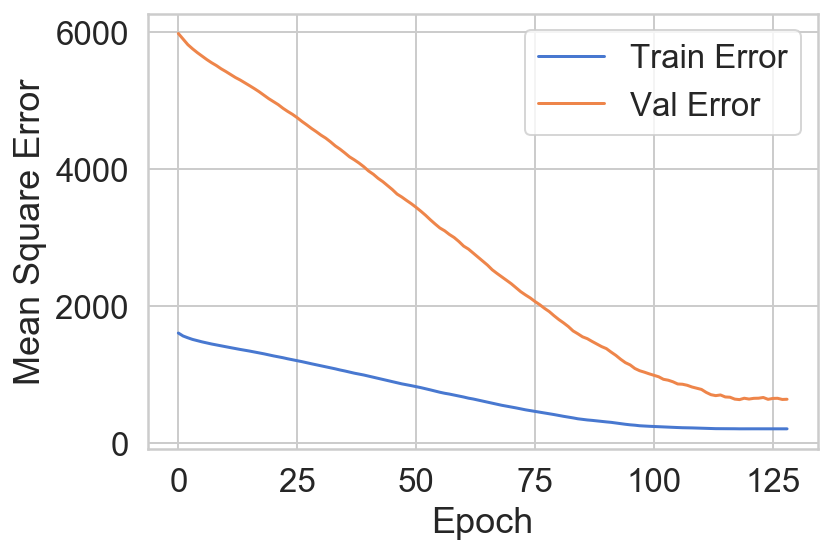

In [46]:
plot_error(history)

# Save/Restore Model

In [47]:
net.save('data/simple_net.h5')

In [48]:
simple_net = keras.models.load_model('data/simple_net.h5')

In [49]:
simple_net.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
